# 📈 Task 2: Predict Future Stock Prices (Short-Term)

## 🎯 Objective:
Predict the **next day's closing price** for a selected stock using regression models (Linear Regression / Random Forest) on historical stock data.

Dataset Source: Yahoo Finance via `yfinance` Python library.



In [2]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
!c:/Users/AAA/AppData/Local/Programs/Python/Python312/python.exe -m pip install yfinance



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 349.5 kB/s eta 0:00:08
     ------ --------------------------------- 0.5/3.0 MB 349.5 kB/s eta 0:00:08
     ---------- ----------------------------- 0.8/3.0 MB 414.5 kB/s eta 0:00:06
     ---------- ----------------------------- 0.8/3.0 MB 414.5 kB/s eta 0:00:06
     ------------- -------------------------- 1.0/3.0 MB 445.6 kB/s eta 0:00:05
     ------------- -------------------------- 1.0/3.0 MB 445.6 kB/s eta 0:00:05
     ------------- ----

In [4]:
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
data.head()


C:\Users\AAA\AppData\Local\Temp\ipykernel_3896\96699266.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620857,72.681304,71.373233,71.627107,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146912,72.753793,71.926884,72.497499,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


## 🛠️ Feature Engineering

We use `Open`, `High`, `Low`, and `Volume` to predict the next day's closing price. 
We create a new column `Target` that contains the closing price of the next day.


In [5]:
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [6]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [7]:
def evaluate(y_test, y_pred, model_name):
    print(f"📊 {model_name} Results:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


📊 Linear Regression Results:
RMSE: 3.11
R² Score: 0.99
📊 Random Forest Results:
RMSE: 25.72
R² Score: -0.02


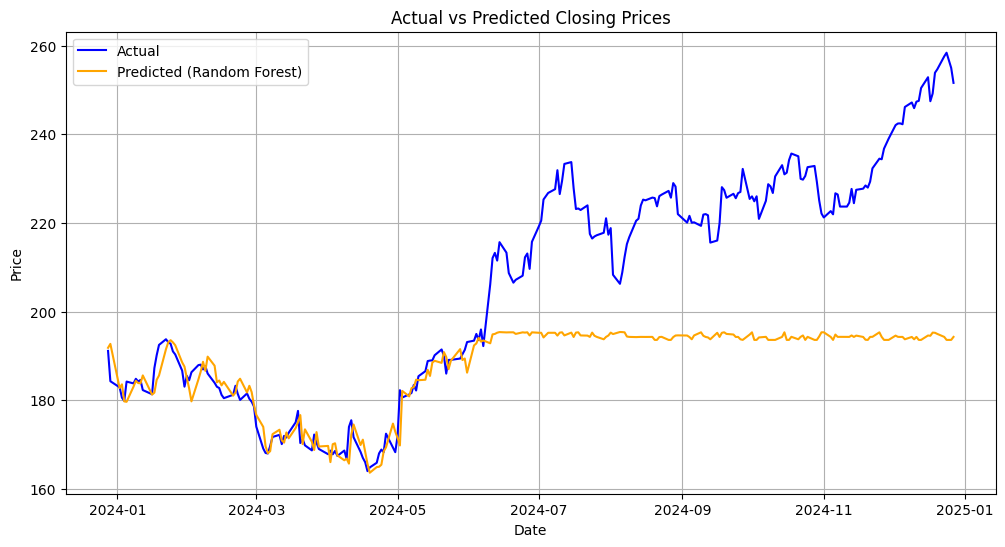

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted (Random Forest)', color='orange')
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


## 🔍 Final Insights

- The Random Forest model performed better than Linear Regression.
- It captures the overall trend but can still miss sharp movements.
- We used basic features. For better accuracy, you can add technical indicators or try deep learning models like LSTM.

✅ Task complete!
